# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
from dython.nominal import cramers_v, theils_u, correlation_ratio, conditional_entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv("output/train_2v.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


## Gender

In [4]:
df.gender.value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

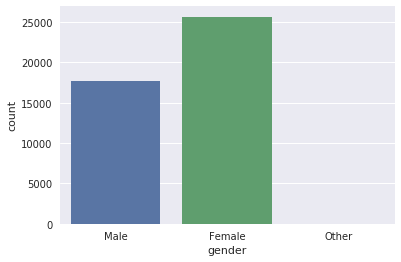

In [5]:
sns.countplot(df.gender)
plt.show()

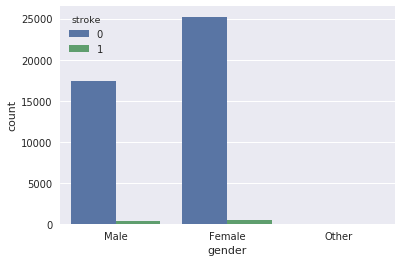

In [6]:
sns.countplot(data=df, x="gender", hue="stroke")
plt.show()

In [9]:
cramers_v(df.gender, df.stroke, nan_strategy="SKIP")

0.009317660176099647

In [10]:
theils_u(df.gender, df.stroke)

0.00010044268191178177

In [15]:
theils_u(df.stroke, df.gender)

0.0007545625125877152

## Age

In [26]:
df.age.describe()

count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

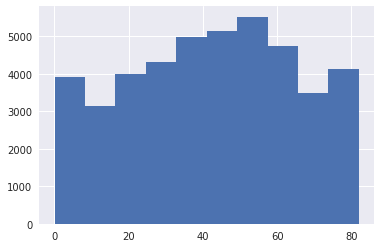

In [15]:
df.age.hist()
plt.show()

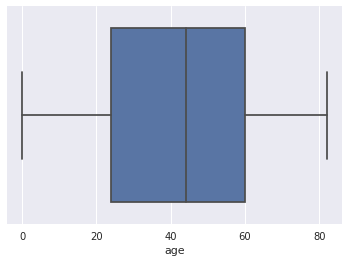

In [18]:
sns.boxplot(df.age)
plt.show()

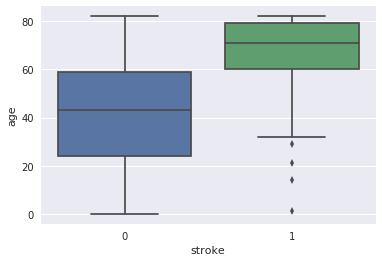

In [35]:
sns.boxplot(data=df, x="stroke", y="age")
plt.show()

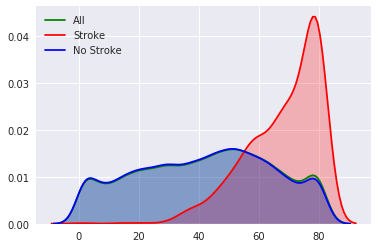

In [30]:
sns.kdeplot(df.age, color='g', shade=True, Label='All') 
sns.kdeplot(df.loc[(df.stroke==1), 'age'], color='r', shade=True, Label='Stroke') 
sns.kdeplot(df.loc[(df.stroke==0), 'age'], color='b', shade=True, Label='No Stroke')

plt.show()

In [11]:
correlation_ratio(df.stroke, df.age)

0.1560489627355862

## Hypertension

In [27]:
df.hypertension.value_counts()

0    39339
1     4061
Name: hypertension, dtype: int64

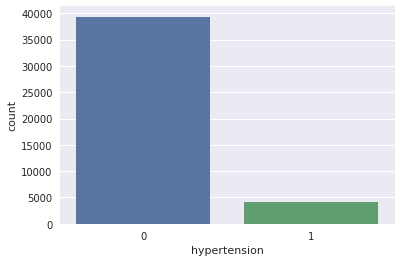

In [28]:
sns.countplot(df.hypertension)
plt.show()

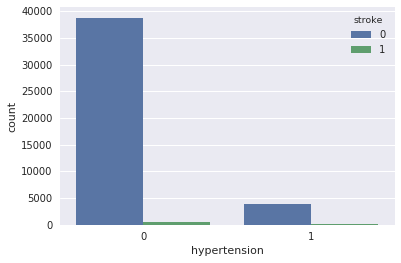

In [29]:
sns.countplot(data=df, x="hypertension", hue="stroke")
plt.show()

In [12]:
cramers_v(df.hypertension, df.stroke, nan_strategy="SKIP")

0.07488220534411462

In [13]:
theils_u(df.hypertension, df.stroke)

0.0065558703869243095

In [14]:
theils_u(df.stroke, df.hypertension)

0.022554930626106452

## Heart Disease

In [16]:
df.heart_disease.value_counts()

0    41338
1     2062
Name: heart_disease, dtype: int64

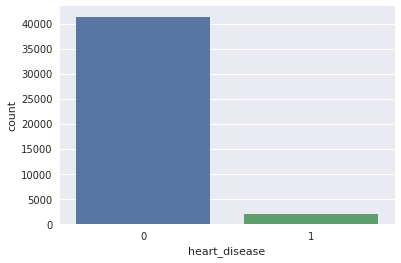

In [17]:
sns.countplot(df.heart_disease)
plt.show()

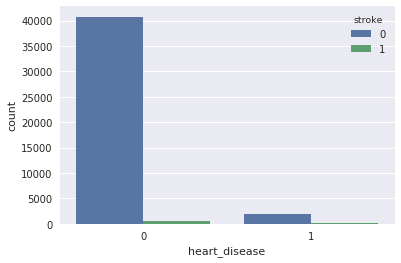

In [18]:
sns.countplot(data=df, x="heart_disease", hue="stroke")
plt.show()

In [19]:
cramers_v(df.heart_disease, df.stroke, nan_strategy="SKIP")

0.11325567927569245

In [20]:
theils_u(df.heart_disease, df.stroke)

0.018743983608994746

In [21]:
theils_u(df.stroke, df.heart_disease)

0.03966511808393581

## Ever Married

In [22]:
df.ever_married.value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

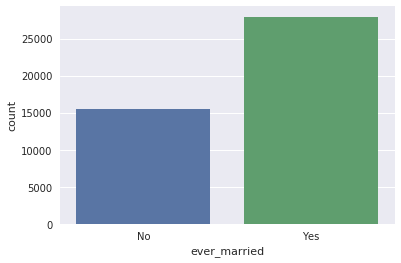

In [23]:
sns.countplot(df.ever_married)
plt.show()

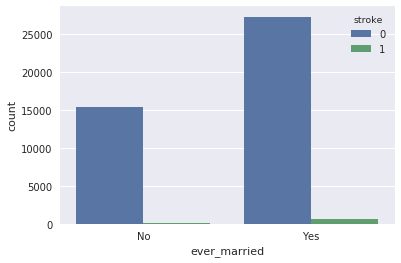

In [24]:
sns.countplot(data=df, x="ever_married", hue="stroke")
plt.show()

In [25]:
cramers_v(df.ever_married, df.stroke, nan_strategy="SKIP")

0.07157882306692893

In [26]:
theils_u(df.ever_married, df.stroke)

0.004811228532831696

In [27]:
theils_u(df.stroke, df.ever_married)

0.03469235389492505

## Work Type

In [28]:
df.work_type.value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

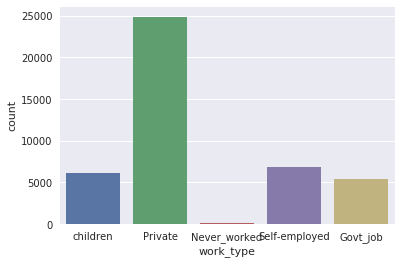

In [29]:
sns.countplot(df.work_type)
plt.show()

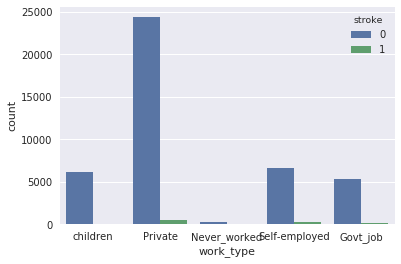

In [30]:
sns.countplot(data=df, x="work_type", hue="stroke")
plt.show()

In [31]:
cramers_v(df.work_type, df.stroke, nan_strategy="SKIP")

0.07534777542412728

In [32]:
theils_u(df.work_type, df.stroke)

0.0031222955685604706

In [33]:
theils_u(df.stroke, df.work_type)

0.040429955850301284

## Residence Type

In [34]:
df.Residence_type.value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

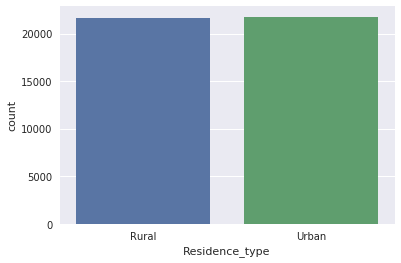

In [35]:
sns.countplot(df.Residence_type)
plt.show()

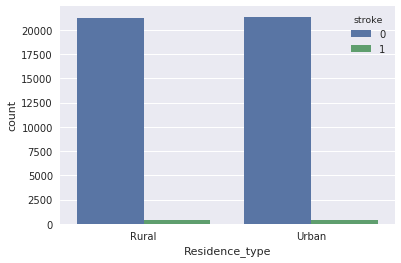

In [36]:
sns.countplot(data=df, x="Residence_type", hue="stroke")
plt.show()

In [38]:
cramers_v(df.Residence_type, df.stroke, nan_strategy="SKIP")

0.0

## Average Glucose Level

In [39]:
df.avg_glucose_level.describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: avg_glucose_level, dtype: float64

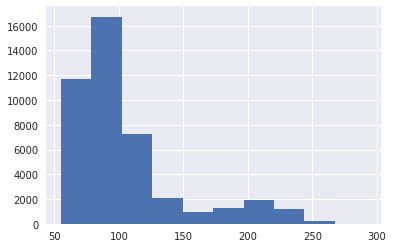

In [40]:
df.avg_glucose_level.hist()
plt.show()

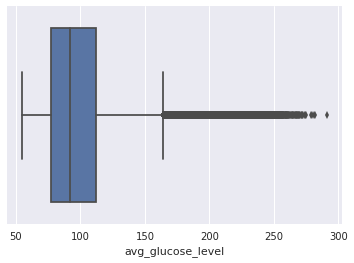

In [42]:
sns.boxplot(df.avg_glucose_level)
plt.show()

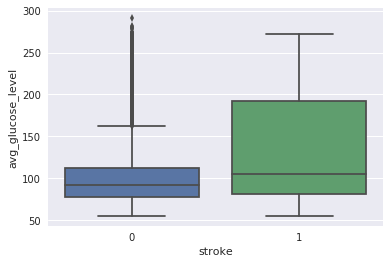

In [43]:
sns.boxplot(data=df, x="stroke", y="avg_glucose_level")
plt.show()

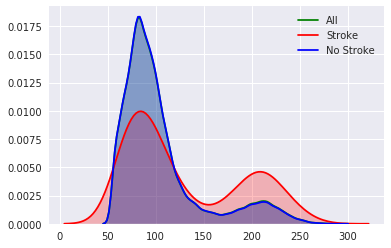

In [44]:
sns.kdeplot(df.avg_glucose_level, color='g', shade=True, Label='All') 
sns.kdeplot(df.loc[(df.stroke==1), 'avg_glucose_level'], color='r', shade=True, Label='Stroke') 
sns.kdeplot(df.loc[(df.stroke==0), 'avg_glucose_level'], color='b', shade=True, Label='No Stroke')

plt.show()

In [45]:
correlation_ratio(df.stroke, df.avg_glucose_level)

0.07891709846978225

## BMI

In [46]:
df.bmi.describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64

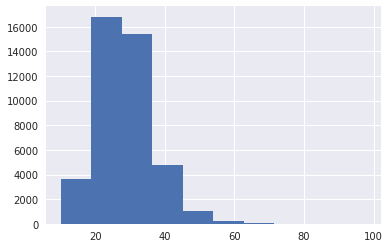

In [47]:
df.bmi.hist()
plt.show()

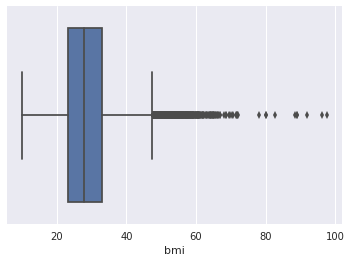

In [48]:
sns.boxplot(df.bmi)
plt.show()

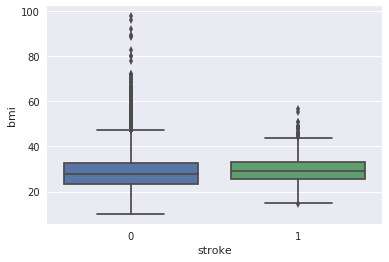

In [50]:
sns.boxplot(data=df, x="stroke", y="bmi")
plt.show()

/home/fernandocamargo/anaconda3/envs/stroke/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/fernandocamargo/anaconda3/envs/stroke/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


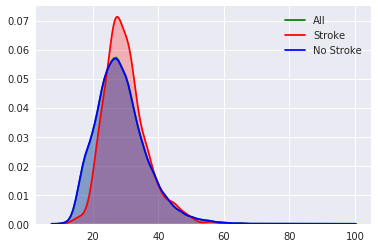

In [51]:
sns.kdeplot(df.bmi, color='g', shade=True, Label='All') 
sns.kdeplot(df.loc[(df.stroke==1), 'bmi'], color='r', shade=True, Label='Stroke') 
sns.kdeplot(df.loc[(df.stroke==0), 'bmi'], color='b', shade=True, Label='No Stroke')

plt.show()

In [52]:
correlation_ratio(df.stroke, df.bmi)

0.04578536712739484

## Smoking Status

In [53]:
df.smoking_status.value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

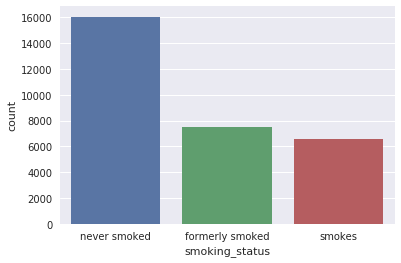

In [54]:
sns.countplot(df.smoking_status)
plt.show()

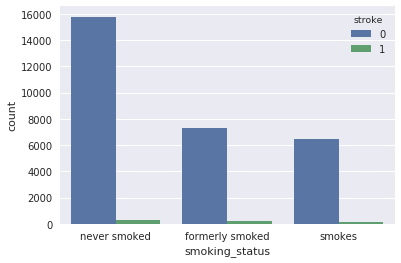

In [55]:
sns.countplot(data=df, x="smoking_status", hue="stroke")
plt.show()

In [56]:
cramers_v(df.smoking_status, df.stroke, nan_strategy="SKIP")

0.032933495292833966

In [72]:
from dython.nominal import numerical_encoding

In [74]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,0,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,0,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,0,0


In [75]:
pd.get_dummies(df)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_0.0,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
1,30468,58.0,1,0,87.96,39.2,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,16523,8.0,0,0,110.89,17.6,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3,56543,70.0,0,0,69.04,35.9,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,46136,14.0,0,0,161.28,19.1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,10.0,0,0,58.64,20.4,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
43396,5450,56.0,0,0,213.61,55.4,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
43397,28375,82.0,1,0,91.94,28.9,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
43398,27973,40.0,0,0,99.16,33.2,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [73]:
encoded_df = numerical_encoding(df)

MemoryError: Unable to allocate array with shape (43403, 43400) and data type uint8